# CITS4402 Project: Normalisation Technique Ablation Study

### Group Members:

- Jalil Inayat-Hussain (22751096)
- Felix Mavrodoglu (23720305)
- Reilly Evans (23615971)

We will begin this ablation study by training a SVM model on the Histogram of Oriented Gradients (HOG) features of the Daimler training dataset. The training set contains 500 images, 250 human and 250 non-human. All hyperparameters for the HOG feature extraction (including the normalisation technique hyperparameter, which this study focuses on) will be set to the initial values described in the project task statement:

- Preprocessing: No gamma correction
- Gradient Computation: [-1, 0, 1] filter without smoothing
- Orientation Binning: 9 bins
- Cell Size: 8×8 pixels
- Block Size: 16×16 pixels
- Block Normalization: L2-Hys normalization (Lowe-style clipped L2 norm)
- Block Stride: 8-pixel spacing (4-fold coverage of each cell)
- Detection Window Size: 64×128 pixels
- Classifier: Linear SVM

The random seed shall be set for each feature extraction/SVM model in this notebook, to ensure results are comparable and reproducible.

Once the model is trained, we will generate the accuracy, precision, recall, F1 score and confusion matrix for it on a separate testing set. The testing set contains 200 images, 100 human and 100 non-human. This allows for detailed comparisons of the performance once additional models are trained.

In [1]:
# Import project functions
from projectFunctions import formatDataset

# Get the features from the data with default parameters
# formatDataset() has the specified parameters as defaults already
_, baseFeatures, baseLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, randomSeed = 48
)
_, baseTestFeatures, baseTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, randomSeed = 48
)

In [2]:
# Import model training and performance analysis functions
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import cross_val_predict

# Create and train SVM classifier
baseSVM = LinearSVC(random_state = 48)
baseSVM.fit(baseFeatures, baseLabels)

# Get accuracy, precision and recall of SVM using test set predictions
'''basePredicts = cross_val_predict(
    baseSVM, baseFeatures, baseLabels, cv = 5
)'''
basePredicts = baseSVM.predict(baseTestFeatures)
baseAccuracy = accuracy_score(baseTestLabels, basePredicts)
basePrecision = precision_score(baseTestLabels, basePredicts)
baseRecall = recall_score(baseTestLabels, basePredicts)
baseFOne = f1_score(baseTestLabels, basePredicts)

# Display performance metrics
print('Default HOG Parameter Scores:')
print(f'Accuracy:  {baseAccuracy:.6}')
print(f'Precision: {basePrecision:.6}')
print(f'Recall:    {baseRecall:.6}')
print(f'F1 Score:  {baseFOne:.6}')

Default HOG Parameter Scores:
Accuracy:  0.925
Precision: 0.912621
Recall:    0.94
F1 Score:  0.926108


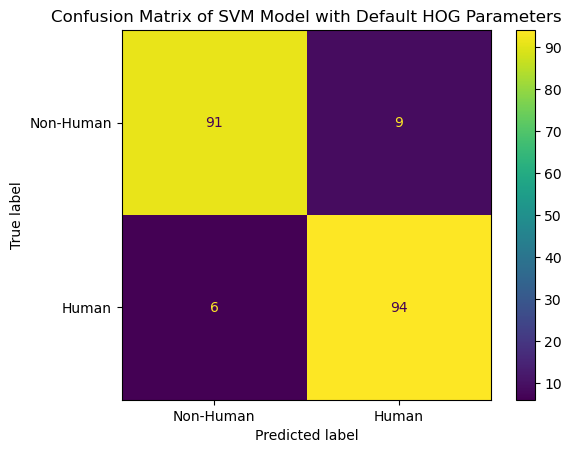

In [3]:
# Import confusion matrix and matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    baseTestLabels, basePredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with Default HOG Parameters')
plt.show()

The default HOG parameters use L2-Hys normalisation, which applies Lowe-style clipping to the Euclidean norm. The scikit-image `hog()` function used for our feature extraction allows for 3 additional normalisation techniques:

- L1 (Manhattan norm with no additional processing)
- L1-sqrt (Square root of Manhattan norm)
- L2 (Euclidean norm with no additional processing)

We will now fit 3 additional SVM models using HOG features generated with these normalisation techniques. Besides the technique, all other parameters (including the random seed) will be set to the same values as the base model, ensuring that no additional factors affect the results.

In [4]:
# Get features with different normalisation techniques
# L1 normalisation
_, lOneFeatures, lOneLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1'
)
_, lOneTestFeatures, lOneTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1'
)

# L1-sqrt normalisation
_, sqrtFeatures, sqrtLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1-sqrt'
)
_, sqrtTestFeatures, sqrtTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1-sqrt'
)

# L2 normalisation
_, lTwoFeatures, lTwoLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L2'
)
_, lTwoTestFeatures, lTwoTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L2'
)

With the new models trained, we will calculate the same performance metrics that were used for the base model. Additionally, we will use a pandas DataFrame to display these metrics in a single, easily understood table.

In [5]:
# Create and train SVM classifiers for each technique
lOneSVM = LinearSVC(random_state = 48)
lOneSVM.fit(lOneFeatures, lOneLabels)

sqrtSVM = LinearSVC(random_state = 48)
sqrtSVM.fit(sqrtFeatures, sqrtLabels)

lTwoSVM = LinearSVC(random_state = 48)
lTwoSVM.fit(lTwoFeatures, lTwoLabels)

# Get accuracy, precision, recall and F1 of SVM with different norms
# L1 normalisation
'''lOnePredicts = cross_val_predict(
    lOneSVM, lOneFeatures, lOneLabels, cv = 5
)'''
lOnePredicts = lOneSVM.predict(lOneTestFeatures)
lOneAccuracy = accuracy_score(lOneTestLabels, lOnePredicts)
lOnePrecision = precision_score(lOneTestLabels, lOnePredicts)
lOneRecall = recall_score(lOneTestLabels, lOnePredicts)
lOneFOne = f1_score(lOneTestLabels, lOnePredicts)

# L1-sqrt normalisation
'''sqrtPredicts = cross_val_predict(
    sqrtSVM, sqrtFeatures, sqrtLabels, cv = 5
)'''
sqrtPredicts = sqrtSVM.predict(sqrtTestFeatures)
sqrtAccuracy = accuracy_score(sqrtTestLabels, sqrtPredicts)
sqrtPrecision = precision_score(sqrtTestLabels, sqrtPredicts)
sqrtRecall = recall_score(sqrtTestLabels, sqrtPredicts)
sqrtFOne = f1_score(sqrtTestLabels, sqrtPredicts)

# L2 normalisation
'''lTwoPredicts = cross_val_predict(
    lTwoSVM, lTwoFeatures, lTwoLabels, cv = 5
)'''
lTwoPredicts = lTwoSVM.predict(lTwoTestFeatures)
lTwoAccuracy = accuracy_score(lTwoTestLabels, lTwoPredicts)
lTwoPrecision = precision_score(lTwoTestLabels, lTwoPredicts)
lTwoRecall = recall_score(lTwoTestLabels, lTwoPredicts)
lTwoFOne = f1_score(lTwoTestLabels, lTwoPredicts)

In [6]:
# Import pandas
import pandas as pd

# Convert model metrics into DataFrame for easy display
techniqueNames = ['L1', 'L1-sqrt', 'L2', 'L2-Hys (Base)']
techniqueMetrics = [
    [lOneAccuracy, lOnePrecision, lOneRecall, lOneFOne],
    [sqrtAccuracy, sqrtPrecision, sqrtRecall, sqrtFOne],
    [lTwoAccuracy, lTwoPrecision, lTwoRecall, lTwoFOne],
    [baseAccuracy, basePrecision, baseRecall, baseFOne]
]
scoreTypes = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
modelScores = pd.DataFrame(
    techniqueMetrics, index = techniqueNames, columns = scoreTypes
)
modelScores.style.set_caption(
    'Performance Scores of Different Normalisation Techniques'
)

,Accuracy,Precision,Recall,F1 Score
L1,0.940000,0.940000,0.940000,0.940000
L1-sqrt,0.930000,0.921569,0.940000,0.930693
L2,0.930000,0.930000,0.930000,0.930000
L2-Hys (Base),0.925000,0.912621,0.940000,0.926108


These results show interesting patterns in the scores of each normalisation technique. The L1 model has the highest scores out of the different models, with 0.94 in all 4 metrics. In contrast, the default L2-Hys model has the lowest accuracy, precision and F1 scores. Most of the models tie for best recall, including both L1 and L2-Hys; only L2 has recall lower than 0.94. L1-sqrt and L2 have equal accuracy and are similar with their other scores; L1-sqrt has higher recall while L2 has higher precision, leading to L1-sqrt ultimately having a slightly higher F1 score.

To get a better understanding of the model performances and possibly understand the reason for the patterns observed in them, we will now plot confusion matrices for each model.

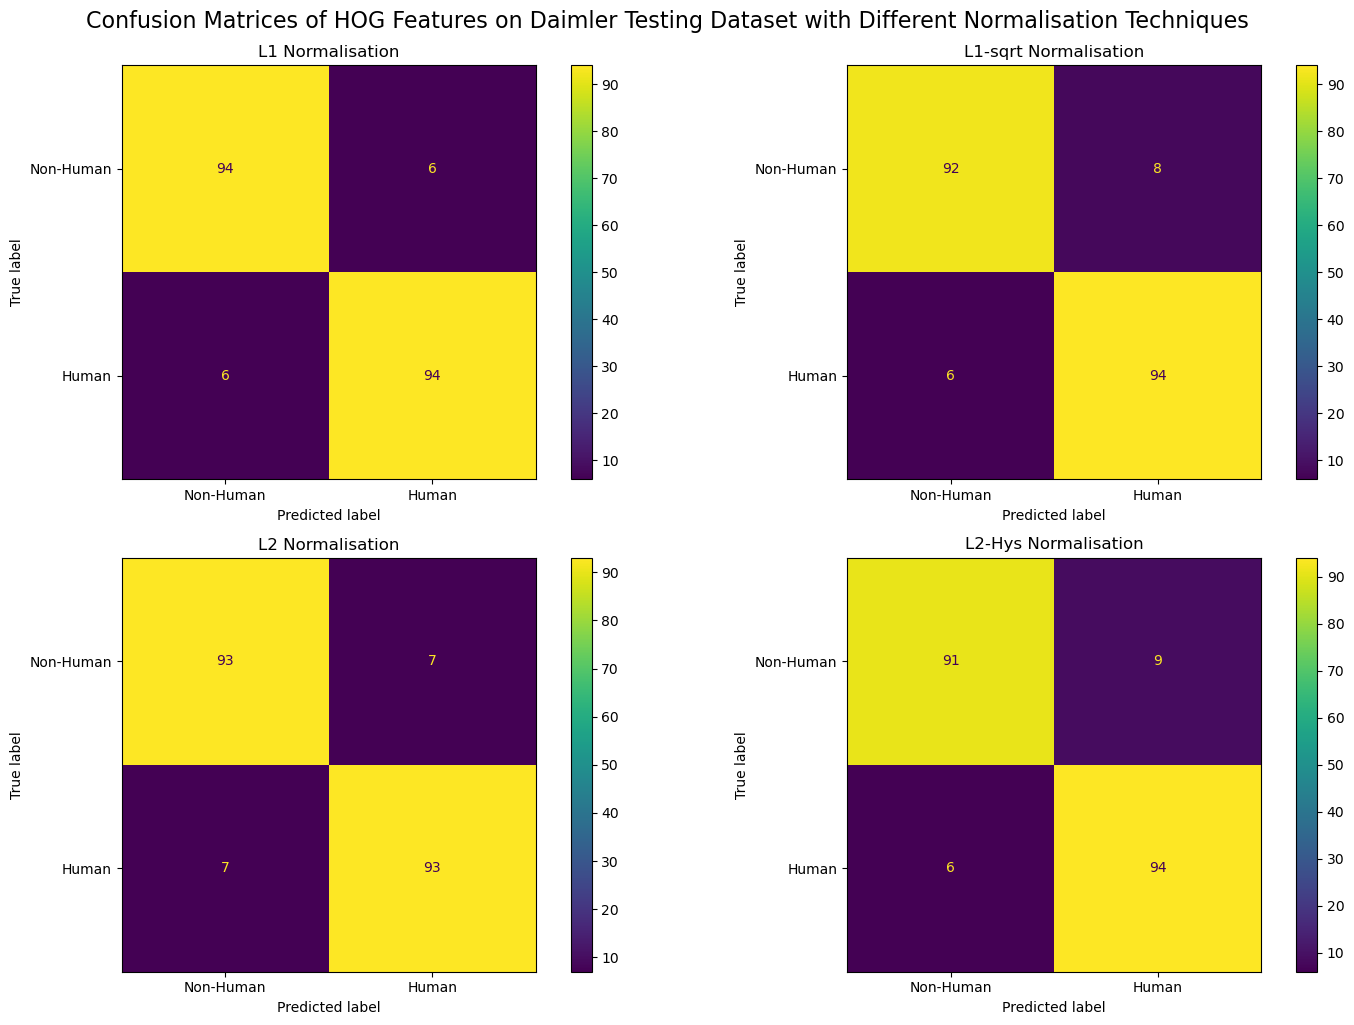

In [7]:
# Display confusion matrices for each normalisation technique
confusionFig, ((lOneAxes, sqrtAxes), (lTwoAxes, baseAxes)) = plt.subplots(
    nrows=2, ncols=2, figsize=(15,10)
)

# L1 normalisation
ConfusionMatrixDisplay.from_predictions(
    lOneTestLabels, lOnePredicts, ax = lOneAxes,
    display_labels = ['Non-Human', 'Human']
)
lOneAxes.set_title('L1 Normalisation')

# L1-sqrt normalisation
ConfusionMatrixDisplay.from_predictions(
    sqrtTestLabels, sqrtPredicts, ax = sqrtAxes,
    display_labels = ['Non-Human', 'Human']
)
sqrtAxes.set_title('L1-sqrt Normalisation')

# L2 normalisation
ConfusionMatrixDisplay.from_predictions(
    lTwoTestLabels, lTwoPredicts, ax = lTwoAxes,
    display_labels = ['Non-Human', 'Human']
)
lTwoAxes.set_title('L2 Normalisation')

# L2-Hys normalisation (default, repeated for easy comparison)
ConfusionMatrixDisplay.from_predictions(
    baseTestLabels, basePredicts, ax = baseAxes,
    display_labels = ['Non-Human', 'Human']
)
baseAxes.set_title('L2-Hys Normalisation')

plt.tight_layout()
confusionFig.suptitle(
    'Confusion Matrices of HOG Features on Daimler Testing Dataset '
    'with Different Normalisation Techniques', fontsize = 16, y = 1.02
)
plt.show()

These confusion matrices reflect many of the observed patterns from the previous performance metrics.

- For human/positive instances, L2 had the lowest true positive rate at 93 correct predictions, while every other model had 94.
- For non-human/negative instances, the models in order from fewest false positives to most are L1, L2, L1-sqrt and L2-Hys.
- L1 and L2 had their correct predictions evenly split between positive and negative, while L1-sqrt and L2-Hys were skewed towards more true positives and fewer false negatives.

We will also gauge the effects of the performance metrics using Reciever Operating Characteristic (ROC) curves and Detection Error Tradeoff (DET) curves. ROC curves plot true positive rate (a.k.a. recall) against false positive rate (false positives / all true negatives); DET curves replace true positive rate with false negative rate (a.k.a. 1 - recall). In the paper linked with the project task statement, they use False Positives Per Window (FPPW) for the DET curves; however, since our HOG feature extraction only uses 1 window this is equivalent to false negative rate. I will also calculate the exact area under the ROC curve (AUC) for each model, since this is another common metric of binary classifier performance.

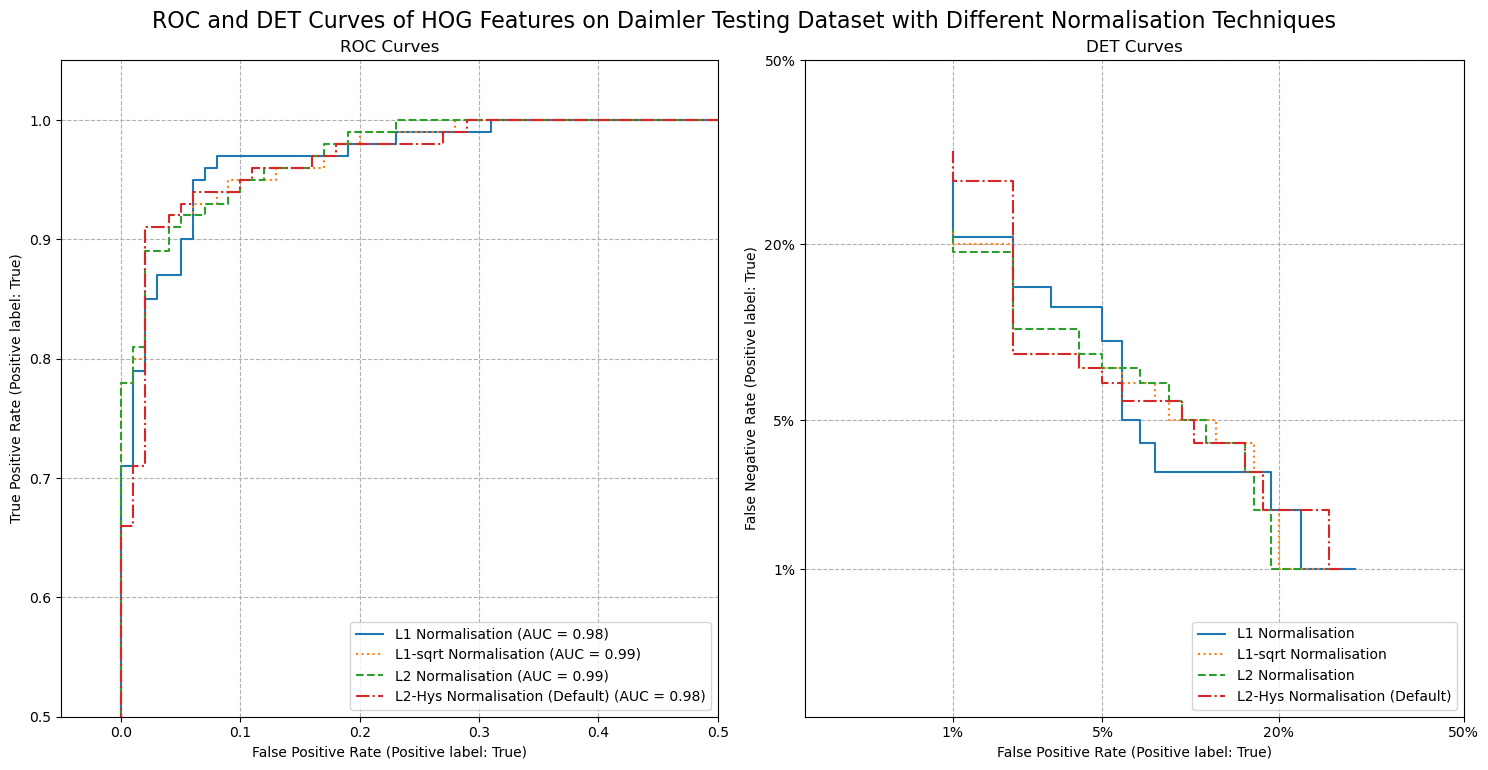

Area under ROC Curve for Different Normalisation Techniques:
L1:      0.9841
L1-sqrt: 0.9853
L2:      0.9855
L2-Hys:  0.9829


In [8]:
# Import DET curve function
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay, roc_auc_score


# Display DET curves for each model
curveFig, [rocAxes, detAxes] = plt.subplots(1, 2, figsize=(15,7.5))

# L1 normalisation
RocCurveDisplay.from_estimator(
    lOneSVM, lOneTestFeatures, lOneTestLabels,
    name = 'L1 Normalisation', ax = rocAxes, linestyle = 'solid'
)
DetCurveDisplay.from_estimator(
    lOneSVM, lOneTestFeatures, lOneTestLabels,
    name = 'L1 Normalisation', ax = detAxes, linestyle = 'solid'
)

# L1-sqrt normalisation
RocCurveDisplay.from_estimator(
    sqrtSVM, sqrtTestFeatures, sqrtTestLabels,
    name = 'L1-sqrt Normalisation', ax = rocAxes, linestyle = 'dotted'
)
DetCurveDisplay.from_estimator(
    sqrtSVM, sqrtTestFeatures, sqrtTestLabels,
    name = 'L1-sqrt Normalisation', ax = detAxes, linestyle = 'dotted'
)

# L2 normalisation
RocCurveDisplay.from_estimator(
    lTwoSVM, lTwoTestFeatures, lTwoTestLabels,
    name = 'L2 Normalisation', ax = rocAxes, linestyle = 'dashed'
)
DetCurveDisplay.from_estimator(
    lTwoSVM, lTwoTestFeatures, lTwoTestLabels,
    name = 'L2 Normalisation', ax = detAxes, linestyle = 'dashed'
)

# L2-Hys normalisation (default)
RocCurveDisplay.from_estimator(
    baseSVM, baseTestFeatures, baseTestLabels, ax = rocAxes,
    name = 'L2-Hys Normalisation (Default)', linestyle = 'dashdot'
)
DetCurveDisplay.from_estimator(
    baseSVM, baseTestFeatures, baseTestLabels, ax = detAxes,
    name = 'L2-Hys Normalisation (Default)', linestyle = 'dashdot'
)

# Add grid lines/titles and zoom in on relevant part of the curve
rocAxes.set_title('ROC Curves')
rocAxes.grid(linestyle="--")
rocAxes.set_xlim([-0.05, 0.5])
rocAxes.set_ylim([0.5, 1.05])

detAxes.set_title('DET Curves')
detAxes.grid(linestyle="--")
detAxes.set_xlim([-3, 0])
detAxes.set_ylim([-3, 0])

plt.tight_layout()
curveFig.suptitle(
    'ROC and DET Curves of HOG Features on Daimler Testing Dataset '
    'with Different Normalisation Techniques', fontsize = 16, y = 1.02
)
plt.show()

# Calculate area under ROC curve
lOneDecisions = lOneSVM.decision_function(lOneTestFeatures)
sqrtDecisions = sqrtSVM.decision_function(sqrtTestFeatures)
lTwoDecisions = lTwoSVM.decision_function(lTwoTestFeatures)
baseDecisions = baseSVM.decision_function(baseTestFeatures)

lOneArea = roc_auc_score(lOneTestLabels, lOneDecisions)
sqrtArea = roc_auc_score(sqrtTestLabels, sqrtDecisions)
lTwoArea = roc_auc_score(lTwoTestLabels, lTwoDecisions)
baseArea = roc_auc_score(baseTestLabels, baseDecisions)

# Display exact area under ROC curve
print('Area under ROC Curve for Different Normalisation Techniques:')
print(f'L1:      {lOneArea:.6}')
print(f'L1-sqrt: {sqrtArea:.6}')
print(f'L2:      {lTwoArea:.6}')
print(f'L2-Hys:  {baseArea:.6}')

The ROC and DET curves provide more insight into the performance of these classifiers. Generally, better classifiers will tend closer to the top-left corner of a ROC graph and the bottom-left corner of a DET graph. The ROC curve shows that the L1 model extends very close to the ROC graph's corner, indicating that it is capable of high true positive rate and low false positive rate simultaneously. However, the graph also shows that the curve pulls inwards from the sides more quickly than the other models; true positive rate begins decreasing at noticeably higher false positive rate values, with it being notably lower at FPR=0.05. As such, the L1 model ultimately has less area under the ROC curve than the L1-sqrt and L2 models, indicating that it may not be as good at distinguishing human and non-human images as its accuracy would suggest. The DET curve further emphasises this pattern; the L1 curve is significantly closer to the bottom-left in some parts of the curve and significantly further away in others. This skewing seems to indicate that it requires a slightly higher false positive rate to get decent recall than the other models.

Once all of these factors are taken into account, overall I believe that the normalisation technique we should use for our model is the L2 norm. This model has the highest area under the ROC curve, indicating a consistent ability to distinguish the two classes; it also has respectably high accuracy and precision. While its F1 score is slightly lower than the L1-sqrt model, its correct predictions are evenly split between the two labels; since there are an equal numbers of positive and negative images in the testing sets, this will allow the L2 model to achieve more consistent results and optimise our model's performance.